In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Spotify's Top Songs

Since the year of 2016, many songs from a multitude of artists on Spotify hit the Top 200 Charts. It takes a lot to make an artist popular, but it also takes some work to create music and have a song hit the top charts. With the data collected, I will be able to determine if a song requires a certain aspect that catches a listener’s ear.

There are many aspects of a song that make it appealing to a listener, such as the key of the song, if the song is major or minor, the time signature, the duration of the song, how many streams the song has had, and how many weeks the song was on the top charts. Some of the data also comes from the Spotify Web API, in which metadata is retrieved from Spotify content. Aspects of songs such as danceability, energy, speechiness, acousticness, instrumentalness, liveness, valence, and loudness are also measured and included in this dataset. 

The dataset, spt, references the spreadsheet which contains a list of songs that have hit the Top 200 Charts on Spotify. This provides data of different aspects of a song that can be used to analyze if there are any patterns that make a song more popular.

In [3]:
spt = pd.read_csv('spotify_top_songs_audio_features.csv')
spt.head()

,id,artist_names,track_name,source,key,mode,time_signature,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,duration_ms,weeks_on_chart,streams
0,000xQL6tZNLJzIrtIgxqSl,"ZAYN, PARTYNEXTDOOR",Still Got Time (feat. PARTYNEXTDOOR),RCA Records Label,G,Major,4 beats,0.748,0.627,0.0639,0.13100,0.0,0.0852,0.524,-6.029,120.963,188491,17,107527761
1,003eoIwxETJujVWmNFMoZy,Alessia Cara,Growing Pains,Def Jam Recordings,C#/Db,Minor,4 beats,0.353,0.755,0.7330,0.08220,0.0,0.3900,0.437,-6.276,191.153,193680,2,9944865
2,003vvx7Niy0yvhvHt4a68B,The Killers,Mr. Brightside,Island Records,C#/Db,Major,4 beats,0.352,0.911,0.0747,0.00121,0.0,0.0995,0.236,-5.230,148.033,222973,125,512388123
3,00B7TZ0Xawar6NZ00JFomN,"Cardi B, Chance the Rapper",Best Life (feat. Chance The Rapper),Atlantic/KSR,A,Major,4 beats,0.620,0.625,0.5530,0.28700,0.0,0.3140,0.665,-7.438,167.911,284856,2,11985346
4,00Blm7zeNqgYLPtW6zg8cj,"Post Malone, The Weeknd",One Right Now (with The Weeknd),Republic Records,C#/Db,Major,4 beats,0.687,0.781,0.0530,0.03610,0.0,0.0755,0.688,-4.806,97.014,193507,30,301860377


## Amount of Streams

The first thing I wanted to determine was if having more streams results in a song being on the charts for a longer period of time. The figure below shows that there is a linear relationship between the amount of streams a song has and how long the song has been on the charts. This makes sense because if a song is played more often, then it will more likely be on the chart for longer.

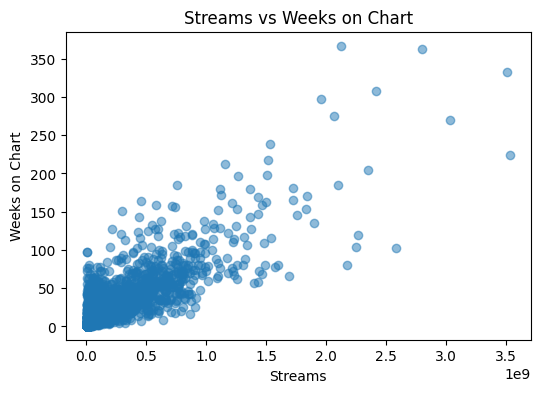

In [4]:
plt.figure(figsize=(6, 4))  

plt.scatter(spt['streams'], spt['weeks_on_chart'], alpha=0.5)

plt.title('Streams vs Weeks on Chart')
plt.xlabel('Streams')
plt.ylabel('Weeks on Chart')

plt.show()

Now that we know that the amount of streams relates to how long a song is on the charts, we will determine how many songs are on the charts that are major mode or minor mode.  

In [5]:
mode_counts = spt['mode'].value_counts()

In [6]:
print("The number of major songs in the dataset is", mode_counts.get('Major', 0))
print("The number of minor songs in the dataset is", mode_counts.get('Minor', 0))

The number of major songs in the dataset is 3747
The number of minor songs in the dataset is 2766


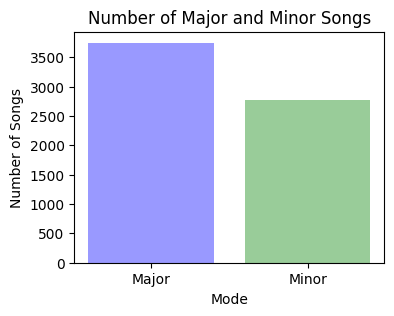

In [7]:
plt.figure(figsize=(4, 3))  
plt.bar(['Major', 'Minor'], mode_counts, color=['blue', 'green'], alpha = 0.4)

plt.title('Number of Major and Minor Songs')
plt.xlabel('Mode')
plt.ylabel('Number of Songs')

plt.show()

In [8]:
difference = mode_counts.get('Major', 0) - mode_counts.get('Minor', 0)

In [123]:
print("The difference between the amount of major and minor songs is", difference)

The difference between the amount of major and minor songs is 981


From the bar graph and the numbers obtained we can clearly see that there are more major songs that have hit the Top 200 Charts compared to minor songs. There is a significant difference between these two modes because it is almost 1000, which leads us to believe that major songs are more popular. 

Now we can take it one step further and see what the correlation is between the amount of streams for each mode. 

In [10]:
maj_songs = spt[spt['mode'] == 'Major']
min_songs = spt[spt['mode'] == 'Minor']

avg_streams_maj = int(maj_songs['streams'].mean())
avg_streams_min = int(min_songs['streams'].mean())

In [11]:
print("The average amount of streams for major songs is", avg_streams_maj)
print("The average amount of streams for minor songs is", avg_streams_min)

The average amount of streams for major songs is 109618620
The average amount of streams for minor songs is 108078906


By calculating the amount of streams for each mode we can determine that there is correlation between these two factors. Major songs have an average amount of streams that are significantly more than the average amount of streams for minor songs. Moving along, I will investigate what makes major songs more popular and what other aspects cause a major song to be preferred.

## Aspects of Major Mode

Now that we know that major songs are more popular compared to minor songs, I am going to look at multiple aspects of majors songs such as time signature, the tempo, how long the duration of a song, and how danceable the song is.  

In [107]:
major_songs = spt[spt['mode'].str.contains('Major')]
minor_songs = spt[spt['mode'].str.contains('Minor')]

The first thing that I am interested in is the time signature of major songs. The general time signature for most songs is 4 beats, therefore we will look specifically at major songs that have a time signature of 4 beats and see if most major songs have this type of time signature. 

In [108]:
time_signature = major_songs.groupby('time_signature').size()
major_4_beats = time_signature_counts.get('4 beats', 0) / len(major_songs) * 100
major_3_beats = time_signature_counts.get('3 beats', 0) / len(major_songs) * 100

In [109]:
print("The percentage of major songs that have a time signature of 4 beats is", major_4_beats)
print("The percentage of major songs that have a time signature of 3 beats is", major_3_beats)

The percentage of major songs that have a time signature of 4 beats is 93.0077395249533
The percentage of major songs that have a time signature of 3 beats is 5.124099279423539


The percentage of major songs that have a time signature of 4 beats is much greater than the percentage of majors songs with a time signature of 3 beats. Now we'll look at a different aspect, the tempo of major songs.

In [110]:
greater_100_tempo = len(major_songs[major_songs['tempo'] > 100])
percentage_greater_100_tempo = greater_100_tempo / len(major_songs) * 100
less_100_tempo = len(major_songs[major_songs['tempo'] < 100])
percentage_less_100_tempo = less_100_tempo / len(major_songs) * 100

In [111]:
print("The percentage of major songs that have a tempo greater than 100 is", percentage_greater_100_tempo)
print("The percentage of major songs that have a tempo less than 100 is", percentage_less_100_tempo)

The percentage of major songs that have a tempo greater than 100 is 72.16439818521484
The percentage of major songs that have a tempo less than 100 is 27.782225780624497


Major songs that have a tempo greater than 100 prove to be more popular due to the percentage being greater than the percentage of major songs that have a tempo less than 100. This can bring us to the conclusion that listeners prefer songs that are fast and upbeat. Another aspect we can look at is the duration, how long a song is, in seconds. Do listeners prefer longer or shorter songs?

In [112]:
greater_2_min = len(major_songs[major_songs['duration_ms'] > 200000])
percentage_greater_2_min = greater_2_min / len(major_songs) * 100
less_2_min = len(major_songs[major_songs['duration_ms'] < 200000])
percentage_less_2_min = less_2_min / len(major_songs) * 100

In [113]:
print("The percentage of major songs that have a duration greater than 20000 ms is", percentage_greater_2_min)
print("The percentage of major songs that have a tempo less than 20000 ms is", percentage_less_2_min)

The percentage of major songs that have a duration greater than 20000 ms is 50.253536162263146
The percentage of major songs that have a tempo less than 20000 ms is 49.746463837736854


As we can see the percentage of majors songs that have a duration greater than 2 minutes compared to majors songs with a duration of less than 2 minutes is about the same. From these results we can claim that the length of a song is not significant in causing it's popularity. Lastly we will look at the danceability of songs, computed from the Spotify Web API, by comparing this aspect between major and minor songs and seeing if this affects the amount of streams each mode gets. 

In [118]:
danceability_maj = major_songs['danceability'].mean()
danceability_min = minor_songs['danceability'].mean()

In [119]:
print("The average danceability of major songs is", danceability_maj)
print("The average danceability of minor songs is", danceability_min)

The average danceability of major songs is 0.6700926074192688
The average danceability of minor songs is 0.697496384671005


In [122]:
average_streams_major = major_songs['streams'].mean()
average_streams_minor = minor_songs['streams'].mean()

In [121]:
print("The average amount of streams for major songs is", average_streams_major)
print("The average amount of streams for minor songs is", average_streams_minor)

The average amount of streams for major songs is 109618620.55617827
The average amount of streams for minor songs is 108078906.93456255


The average danceability and amount of streams between the two different modes of songs are pretty close to each other. But if we look closer at the numbers we can see that minor songs actually have a larger average for danceability, yet it has a lower average amount of streams. Therefore danceability and the amount of streams are not necessarily synonymous, danceability does not make a song more popular. 

## Conclusion

While most popular songs have similar aspects that make it hit the top charts, there are still other factors that may not be as significant. After exploring different aspects of songs, specifically aspects of songs in the major mode, I have found that tempo and time signature play a role in making a song popular. There is a greater percentage of major songs that have a tempo greater than 100 and a time signature of 4 beats compared to a tempo less than 100 or a time signature of 3 beats. However, there are other aspects that don't affect the popularity of a song or which mode a song is in, such as the duration of danceability. In conclusion, listeners prefer songs that have a stable tempo as well as a happy and upbeat attitude. If artists want to hit the charts, they should refrain from writing songs that are slower and produce a darker tone. 